# Sistema de predicción de ventas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# 1. Upload the data collection

In [6]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
total_data.head(5)

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


# 1.1 Transform to Datetime

In [8]:
total_data["date"] = pd.to_datetime(total_data.date)
total_data = total_data.set_index("date")
new_data = total_data["sales"]
new_data.head(5)

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

# 1.2 Time series graphic

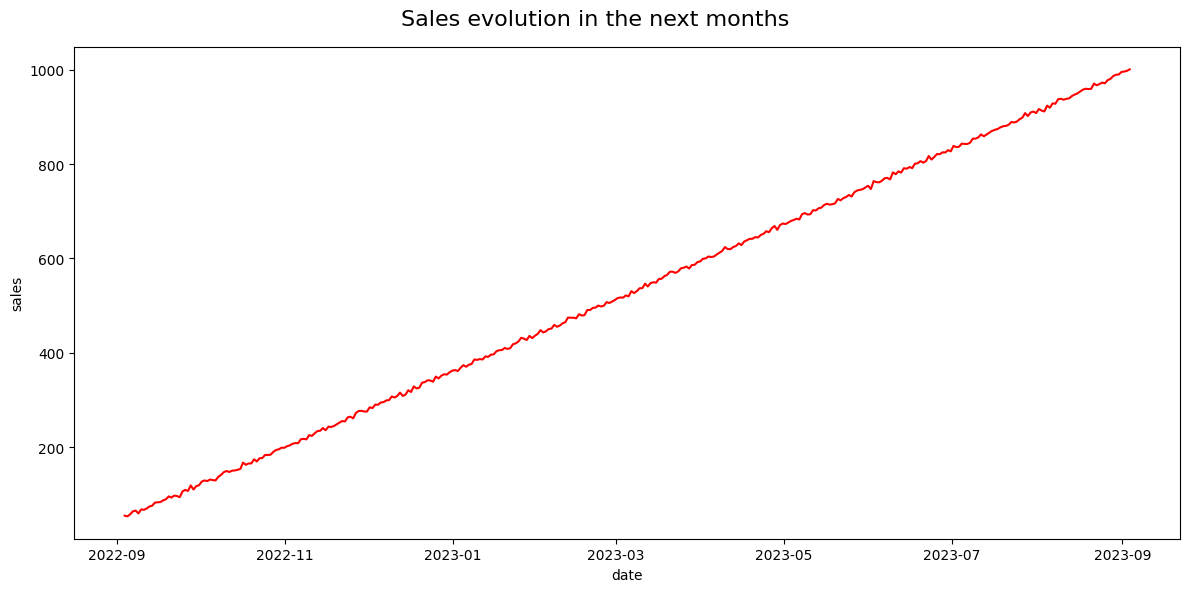

In [23]:
fig, axis = plt.subplots(figsize = (12, 6))
fig.suptitle("Sales evolution in the next months", fontsize=16)

sns.lineplot(data = new_data, color = "red")

plt.tight_layout()
plt.show()

# 2. Creating the time series

In [25]:
def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(new_data)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [26]:
decomposition = seasonal_decompose(new_data)
decomposition

# Trend analysis 

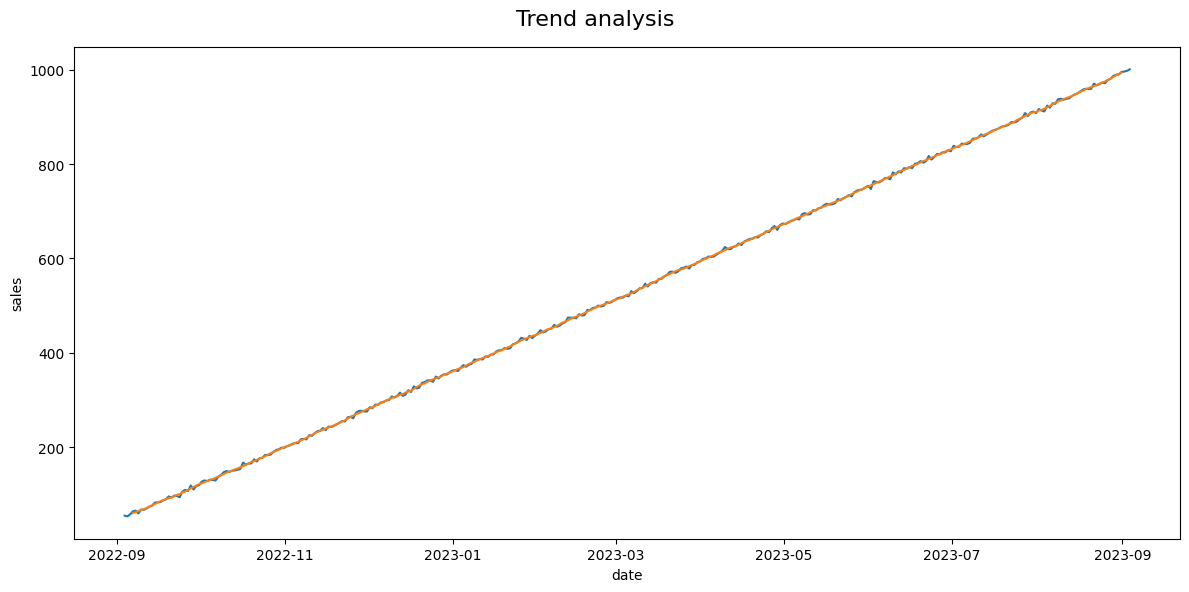

In [31]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (12, 6))
fig.suptitle("Trend analysis", fontsize=16)

sns.lineplot(data = new_data)
sns.lineplot(data = trend)

plt.tight_layout()
plt.show()